<a href="https://colab.research.google.com/github/667029/KVP10k/blob/main/LayoutLMv3_kvp10k_Relation_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets torch transformers accelerate numpy tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Definerer drive lokasjon
drive_mount_path='/content/drive'

In [3]:
import torch
from datasets import load_from_disk

class DataUtil:
    @staticmethod
    def get_output(dataset_path=None, model_output=None, drive_mount_path=drive_mount_path, extract_hidden=False, verbose=True):
        # Hvis vi mottar dataset_path tar vi å henter pre_prosessert hidden_state som vi konverterer til dataset formatet våres
        if dataset_path is not None:
            try:
                from google.colab import drive
                drive.mount(drive_mount_path, force_remount=False)
            except Exception as e:
                if verbose:
                    print("Google Drive may already be mounted. Continuing...")
            dataset = load_from_disk(dataset_path)
            if verbose:
                print("Loaded dataset from drive.")
                print("Number of samples:", len(dataset))
                print("Column names:", dataset.column_names)
                print("First sample:", dataset[0])
            return dataset

        # Hvis vi mottar output fra en model tar vi å henter ut hidden_states fra outputet
        elif model_output is not None:
            if extract_hidden:
                # If model_output is a dict with a 'hidden_states' key, extract it.
                if isinstance(model_output, dict) and "hidden_states" in model_output:
                    model_output = model_output["hidden_states"]
                # If the model output is a list/tuple, assume the last element is hidden states.
                elif isinstance(model_output, (list, tuple)):
                    model_output = model_output[-1]
            if verbose:
                print("Provided model output:")
                print(model_output)
            return model_output

        else:
            raise ValueError("Please provide either a dataset_path or a model_output.")

In [4]:
import torch

# 1. # Hent dataset fra drive
dataset_path = "/content/drive/MyDrive/RE_ready/re_dataset_test_combined"
dataset = DataUtil.get_output(dataset_path=dataset_path)

# 2. # Hent dataset fra output av layoutmvl3 modellen
# model_output = outputs
# dataset = DataUtil.save_output_as_dataset(model_output=model_output, verbose=True)

# Kontroll av dataset
print("Number of samples:", len(dataset))
print("Column names:", dataset.column_names)

sample = dataset[0]
print("First sample:", sample)


Mounted at /content/drive
Loaded dataset from drive.
Number of samples: 143476
Column names: ['h_i', 'h_j', 'label']
First sample: {'h_i': [-0.03574247285723686, -0.015568173490464687, 0.04433594271540642, -0.2551768124103546, 0.5431303381919861, -0.052284833043813705, 0.1384091079235077, 0.27487412095069885, -0.17961081862449646, -0.10797158628702164, -0.46370697021484375, -0.14926613867282867, -0.09300041943788528, 0.06408052891492844, 0.12591618299484253, -0.3600463271141052, -0.06332714110612869, -0.20246948301792145, -0.25451621413230896, 0.36145108938217163, -0.012236740440130234, -0.0203297920525074, 0.12791365385055542, -0.06409116834402084, -0.023888980969786644, 0.1217065379023552, 0.14684250950813293, -0.341422438621521, -0.08902009576559067, 0.03113497979938984, -0.3619805574417114, -0.2470576912164688, -0.39857348799705505, -0.16561433672904968, -0.2645741105079651, -0.19168643653392792, 0.04270109906792641, 0.03634512424468994, -0.20749381184577942, -0.2225838303565979, 0

In [5]:
from torch.utils.data import DataLoader, Dataset
# Konverterer for dataset til tensor fra hiddenstate
class RelationDataset(Dataset):
    def __init__(self, hf_dataset, hidden_size=768):
        self.dataset = hf_dataset
        self.hidden_size = hidden_size

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        # Konverter  til tensor verdier fra tallformat
        h_i = torch.tensor(sample["h_i"], dtype=torch.float32)
        h_j = torch.tensor(sample["h_j"], dtype=torch.float32)

        # Kontroler at hidden_size er suttet til riktig størrelse i forhold til datasettet
        if h_i.size(0) != self.hidden_size or h_j.size(0) != self.hidden_size:
            raise ValueError(f"Expected hidden size {self.hidden_size}, but got {h_i.size(0)} or {h_j.size(0)}")

        label = torch.tensor(sample["label"], dtype=torch.long)
        return h_i, h_j, label

In [6]:
# Opprett dataset laster
hidden_size = 768  # trenger å være riktig iforhold til dataset
relation_dataset = RelationDataset(dataset, hidden_size=hidden_size)
train_loader = DataLoader(relation_dataset, batch_size=32, shuffle=True)

In [7]:

import torch
import torch.nn as nn

# Extender torch nn sin model med våres
class RelationExtractionHead(nn.Module):
    def __init__(self, hidden_size, num_relations):
        super().__init__()
        self.head_proj = nn.Linear(hidden_size, hidden_size)
        self.tail_proj = nn.Linear(hidden_size, hidden_size)
        self.bilinear = nn.Bilinear(hidden_size, hidden_size, num_relations)

    def forward(self, h_i, h_j):
        head = self.head_proj(h_i)
        tail = self.tail_proj(h_j)
        logits = self.bilinear(head, tail)
        return logits



Epoch 1/2: 100%|██████████| 4484/4484 [29:48<00:00,  2.51it/s]


Epoch 1/2, Average Loss: 0.0158


Epoch 2/2: 100%|██████████| 4484/4484 [20:15<00:00,  3.69it/s]

Epoch 2/2, Average Loss: 0.0157


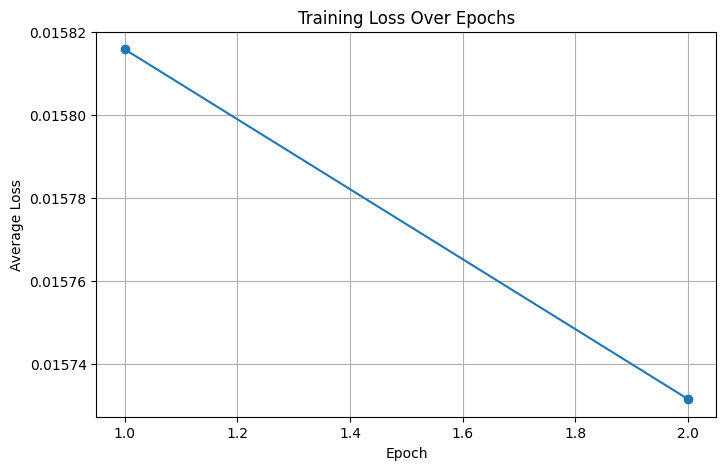

In [8]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.optim as optim

# Definer paramerere
num_relations = 5       # Antall type relasjoner
num_epochs = 2          # Antall ganger vi skal gå over datasettet
learning_rate = 1e-4    # Læringsraten for hvor mye vekt den skal ha på hver læring

# Definer model, loss, og optimaliserer
model = RelationExtractionHead(hidden_size=hidden_size, num_relations=num_relations)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Sett modellen i traning mode
model.train()

# Training loop
loss_history = []  # Loss historikk for visualisering
for epoch in range(num_epochs):
    epoch_loss = 0.0

    for h_i_batch, h_j_batch, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()
        logits = model(h_i_batch, h_j_batch)  # logits shape: (batch_size, num_relations)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

# Plot figur for loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), loss_history, marker='o', linestyle='-')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.grid(True)
plt.show()

# Lagre modellen til drive
# torch.save(model.state_dict(), "/content/drive/MyDrive/RE_ready/relation_layer_model.pt")

In [17]:
import torch
import torch.nn.functional as F
from torch.utils.data import Subset, DataLoader
import numpy as np
from sklearn.metrics import classification_report


class RelationModelTester:
    def __init__(self, model, dataset, batch_size=32, device=None):
        self.model = model
        self.dataset = dataset
        self.batch_size = batch_size
        self.device = device if device is not None else ("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

    def evaluate(self, start_idx=0, end_idx=None):
        if end_idx is None:
            end_idx = len(self.dataset)

        # Select a subset of the dataset using torch.utils.data.Subset.
        subset_indices = list(range(start_idx, end_idx))
        subset_dataset = Subset(self.dataset, subset_indices)
        dataloader = DataLoader(subset_dataset, batch_size=self.batch_size, shuffle=False)

        self.model.eval()
        all_predictions = []
        all_ground_truths = []
        all_probabilities = []


        with torch.no_grad():
            for h_i_batch, h_j_batch, labels_batch in dataloader:
                h_i_batch = h_i_batch.to(self.device)
                h_j_batch = h_j_batch.to(self.device)
                labels_batch = labels_batch.to(self.device)

                logits = self.model(h_i_batch, h_j_batch)
                probs = F.softmax(logits, dim=-1)
                preds = logits.argmax(dim=-1)

                all_predictions.extend(preds.cpu().numpy())
                all_ground_truths.extend(labels_batch.cpu().numpy())
                all_probabilities.extend(probs.cpu().numpy())


        # Convert lists to numpy arrays for metric computation
        all_predictions = np.array(all_predictions)
        all_ground_truths = np.array(all_ground_truths)
        report = classification_report(all_ground_truths, all_predictions, digits=4)
        print(report)


        return {
            "predictions": all_predictions,
            "ground_truth": all_ground_truths,
            "accuracy": np.mean(all_predictions == all_ground_truths),
            "probabilities": all_probabilities
        }

In [18]:
tester = RelationModelTester(model, relation_dataset, batch_size=32)
results = tester.evaluate(start_idx=0, end_idx=100)

print("Test Accuracy on subset: {:.2f}%".format(results["accuracy"] * 100))
print("Example Predictions (first 10 samples):", results["predictions"][:10])
print("Example Probabilities (first sample):", results["probabilities"][0])

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         2
           1     1.0000    1.0000    1.0000        98

    accuracy                         1.0000       100
   macro avg     1.0000    1.0000    1.0000       100
weighted avg     1.0000    1.0000    1.0000       100

Test Accuracy on subset: 100.00%
Example Predictions (first 10 samples): [0 0 1 1 1 1 1 1 1 1]
Example Probabilities (first sample): [1.0000e+00 0.0000e+00 0.0000e+00 6.9818e-41 6.6982e-43]
